# Simple Linear Regression

## Importing the necessary Libraries and Packages

In [1]:
import matplotlib.pyplot as plt  # data plotting
import numpy as np  # data processing
import pandas as pd  # data processing
from joblib import dump  # saving the model
from matplotlib.markers import MarkerStyle  # data plotting
from sklearn.linear_model import LinearRegression  # regression algorithm
from sklearn.metrics import (mean_absolute_error,
                             mean_absolute_percentage_error,
                             mean_squared_error, mean_squared_log_error,
                             r2_score)
from sklearn.model_selection import train_test_split  # splitting the dataset

## Importing the csv file as a DataFrame

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Exploratory Data Analysis

Formal information about the dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


Description of the dataset


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Checking if any null value exists


In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Columns of the dataset


In [6]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

Correlations between the variables


In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Now taking 2 parts from the dataset
### X : which contains only the <b>YearsExperience</b> column<br>y : which contains only the <b>Salary</b> column 

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Visualization of the data

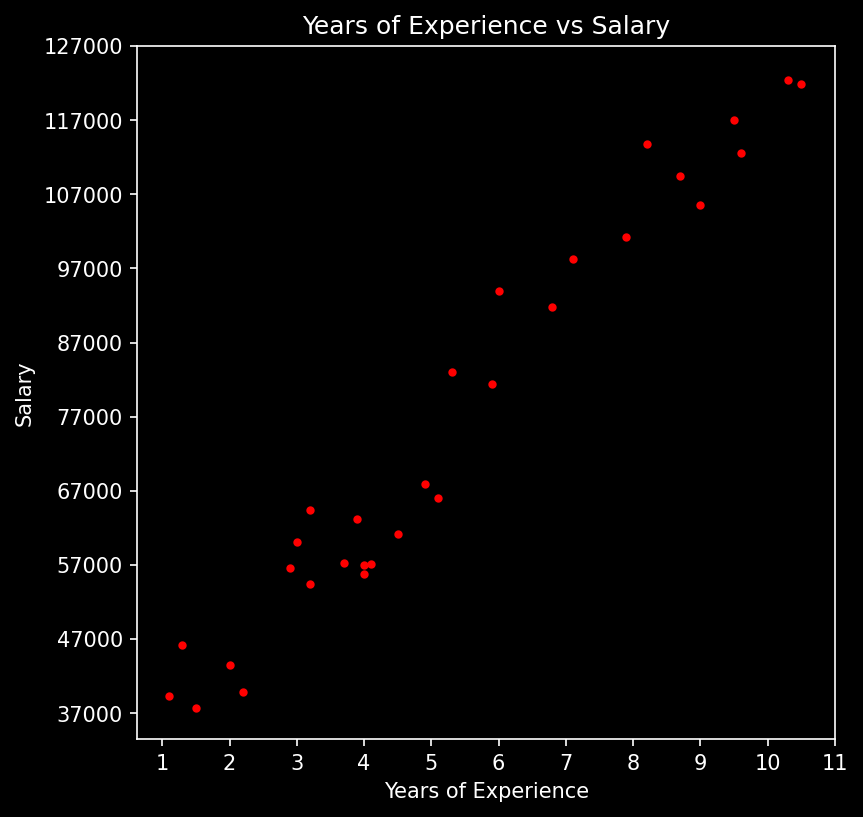

In [9]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
YearsExperience = df['YearsExperience']
Salary = df['Salary']
plt.scatter(YearsExperience, Salary, marker=MarkerStyle('.'), color='red')
plt.xticks(np.arange(1, 12, 1))
plt.yticks(np.arange(37000, 128000, 10000))
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.savefig('Images/Years_Experience_vs_Salary.png', bbox_inches='tight')

## Split the <b>X</b> and <b>y</b> Dataframes for Test and Training

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Implementation of the Model

In [11]:
slr = LinearRegression()
slr.fit(X_train, y_train)
y_pred = slr.predict(X_test)

## Performance of the Model

In [12]:
print('The coefficient of determination :', r2_score(y_test, y_pred))
adjusted_r2_score = 1-((1-r2_score(y_test, y_pred))*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1)
print('The adjusted coefficient of determination :', adjusted_r2_score)

The coefficient of determination : 0.9817404960196033
The adjusted coefficient of determination : 0.9634809920392067


## Plotting the Regression

### Training Dataset

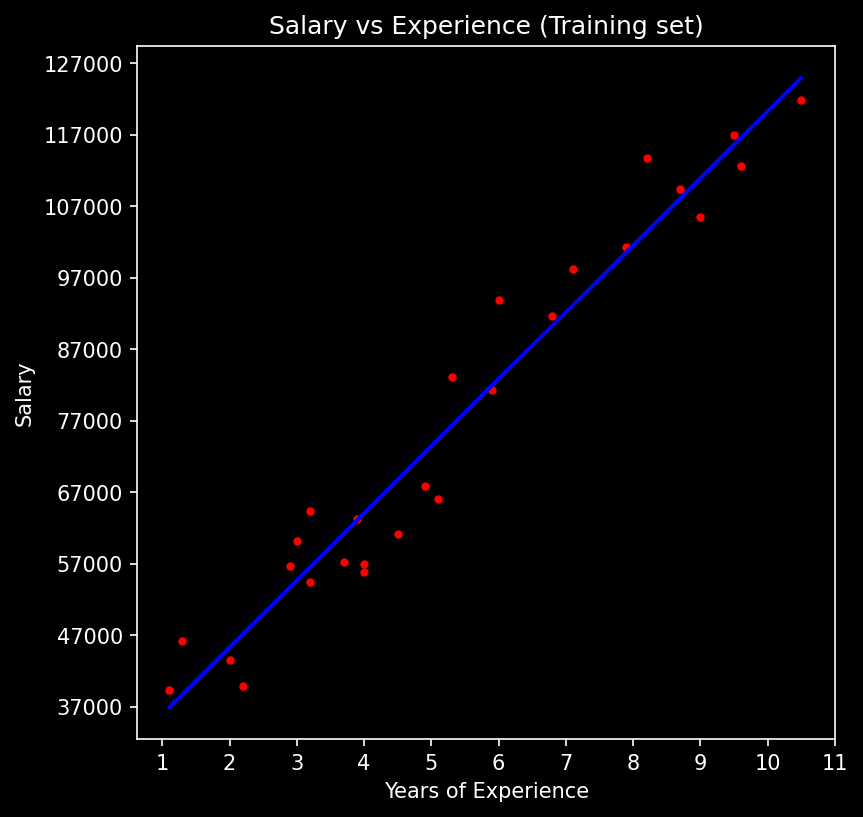

In [13]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
plt.scatter(X_train, y_train, marker=MarkerStyle('.'), color='red')
plt.plot(X_train, slr.predict(X_train), color='blue')
plt.xticks(np.arange(1, 12, 1))
plt.yticks(np.arange(37000, 128000, 10000))
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.savefig('Images/Training_set.png', bbox_inches='tight')

### Test Dataset

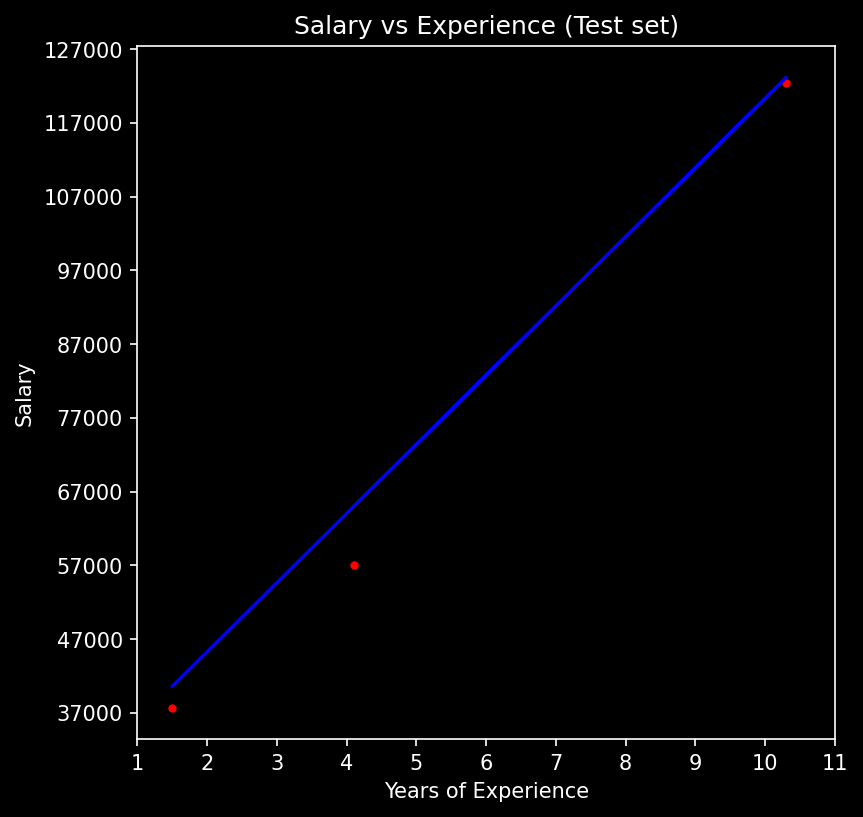

In [14]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
plt.scatter(X_test, y_test, marker=MarkerStyle('.'), color='red')
plt.plot(X_test, slr.predict(X_test), color='blue')
plt.xticks(np.arange(1, 12, 1))
plt.yticks(np.arange(37000, 128000, 10000))
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.savefig('Images/Test_set.png', bbox_inches='tight')

## Additional Performance Metrics

In [15]:
print('Mean Absolute Error (MAE) :', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE) :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE) :', mean_squared_error(y_test, y_pred, squared=False))
print('Mean Squared Log Error (MSLE) :', mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Log Error (RMSLE) :', mean_squared_log_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE) :', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error (MAE) : 3863.2930990734676
Mean Squared Error (MSE) : 23954712.6579975
Root Mean Squared Error (RMSE) : 4894.355183065232
Mean Squared Log Error (MSLE) : 0.007478624316654368
Root Mean Squared Log Error (RMSLE) : 0.08647903975330883
Mean Absolute Percentage Error (MAPE) : 0.07398568080725787


## Saving the Model

In [16]:
dump(slr, 'simpleLinearRegressor.joblib')

['simpleLinearRegressor.joblib']